## データセットのダウンロード

In [1]:
import os 
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file("cats_and_dogs.zip", origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), "cats_and_dogs_filtered")

train_dir = os.path.join(PATH, "train")
validation_dir = os.path.join(PATH, "validation")

train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")
validation_cats_dir = os.path.join(validation_dir, "cats")
validation_dogs_dir = os.path.join(validation_dir, "dogs")

68608000/68606236 [==============================] - 0s 0us/step


## 画像の枚数を出力

In [2]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
print("training cat images:", num_cats_tr)
print("training dog images:", num_dogs_tr)

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
print("validation cat images:", num_cats_val)
print("validation dog images:", num_dogs_val)

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val
print("Total traing images:", total_train)
print("Total validation images:", total_val)

training cat images: 1000
training dog images: 1000
validation cat images: 500
validation dog images: 500
Total traing images: 2000
Total validation images: 1000


## ジェネレーターを生成し、画像を加工処理する

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size=32
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
        batch_size=batch_size,
        directory=train_dir,
        shuffle=True,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        class_mode="binary")

val_data_gen = validation_image_generator.flow_from_directory(
        batch_size=batch_size,
        directory=validation_dir,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 正解ラベルの割り当てを確認する

In [4]:
print(train_data_gen.class_indices)
print(val_data_gen.class_indices)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


## 画像を可視化してみる

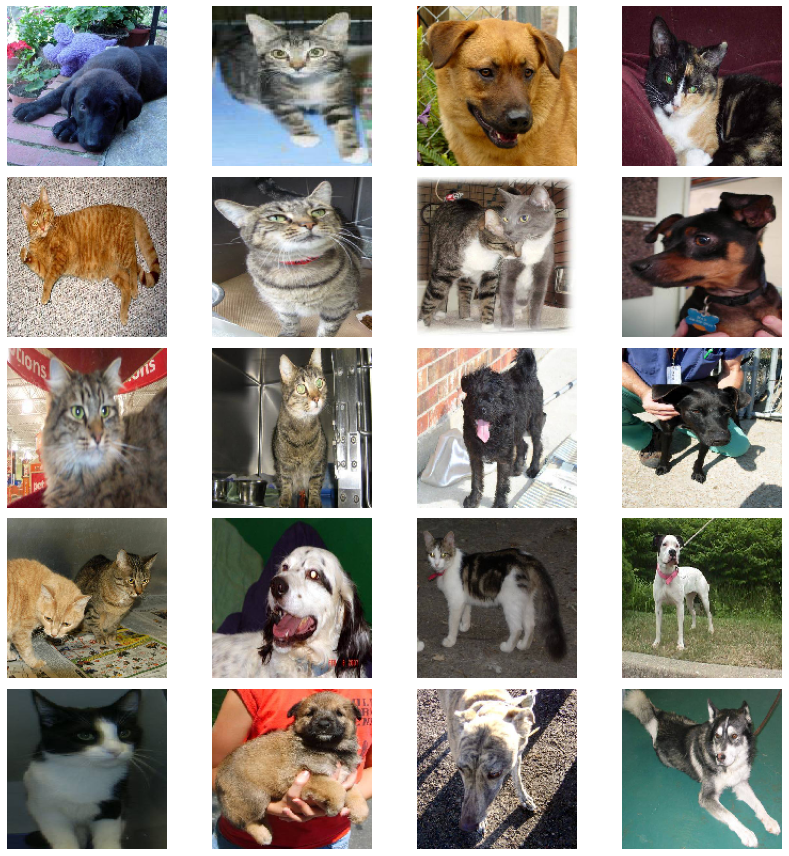

In [5]:
import matplotlib.pyplot as plt 

# 学習用のジェネレーターからミニバッチを抽出
sample_training_images, _ = next(train_data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(5,4, figsize=(12,12))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()
    
plotImages(sample_training_images[:20])

## データのダウンロード

In [6]:
import os 
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

#　データセットのアーカイブバージョンをダウンロードし、"/tmp/"ディレクトリに保持
_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file("cats_and_dogs.zip", origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), "cats_and_dogs_filtered")

train_dir = os.path.join(PATH, "train")
validation_dir = os.path.join(PATH, "validation")

## データジェネレーターを生成する関数の定義

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def ImageDatagenerate(train_dir, validation_dir):
        batch_size=32
        epochs = 15
        IMG_HEIGHT = 224
        IMG_WIDTH = 224

        train_image_generator = ImageDataGenerator(
            rescale=1./255,
            rotation_range=15,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode="nearest",
            width_shift_range=0.1,
            height_shift_range=0.1
            )
        validation_image_generator = ImageDataGenerator(rescale=1./255)

        # flow_from_directory()メソッドでディスクから画像を読み込み、
        # リスケーリングして画像を必要な大きさにリサイズ
        # 訓練データ
        train_data_gen = train_image_generator.flow_from_directory(
                batch_size=batch_size,
                directory=train_dir,
                shuffle=True,
                target_size=(IMG_HEIGHT, IMG_WIDTH),
                class_mode="binary")
        # 検証データ
        val_data_gen = validation_image_generator.flow_from_directory(
                batch_size=batch_size,
                directory=validation_dir,
                target_size=(IMG_HEIGHT, IMG_WIDTH),
                class_mode="binary")
        
        return train_data_gen, val_data_gen

## モデルの生成から学習までを実行する関数の定義

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras import optimizers

def train_CNN(train_data_gen, val_data_gen):
    # 画像のサイズを取得
    image_size = len(train_data_gen[0][0][0])
    # 入力データの形状をタプルにする
    input_shape = (image_size, image_size, 3)
    batch_size = len(train_data_gen[0][0])
    total_train = len(train_data_gen)*batch_size
    total_validate = len(val_data_gen)*batch_size
    
    model = Sequential()
    # 層1
    model.add(
            Conv2D(filters=32,
                           kernel_size=(3,3),
                          padding="same",
                          input_shape=input_shape,
                          activation="relu"
                          ))
    # プーリング層
    model.add(
        MaxPooling2D(pool_size=(2,2)))
    # ドロップアウト
    model.add(Dropout(0.25))
    
    # 層3
    model.add(
            Conv2D(filters=32,
                           kernel_size=(3,3),
                          activation="relu"
                          ))
    # プーリング層
    model.add(
            MaxPooling2D(pool_size=(2,2)))
    # ドロップアウト
    model.add(Dropout(0.25))
    # 層5
    model.add(
            Conv2D(filters=64,
                           kernel_size=(3,3),
                          activation="relu"
                          ))
    # プーリング層
    model.add(
            MaxPooling2D(pool_size=(2,2)))
    # ドロップアウト
    model.add(Dropout(0.25))
    # Flatten層
    model.add(Flatten())
    
    # 層7
    model.add(Dense(64,
                               activation="relu"
                               ))
    # ドロップアウト
    model.add(Dropout(0.5))
    # 層8
    model.add(Dense(1,
                               activation="sigmoid"
                               ))
    
    # compile
    model.compile(
            loss="binary_crossentropy", 
            optimizer=optimizers.Adam(), # Adamを使用
            metrics=["accuracy"])

    model.summary()
    
    epochs = 60
    history = model.fit(
            train_data_gen,
            epochs=epochs,
            validation_data=val_data_gen,
            validation_steps=total_validate//batch_size,
            steps_per_epoch=total_train//batch_size,
            verbose=1)
    
    return history

## 学習を行う

In [9]:
%%time

train_data_gen, val_data_gen = ImageDatagenerate(train_dir, validation_dir)
history = train_CNN(train_data_gen, val_data_gen)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 55, 55, 32)        0         
______________________________________

## 学習の推移をグラフにする

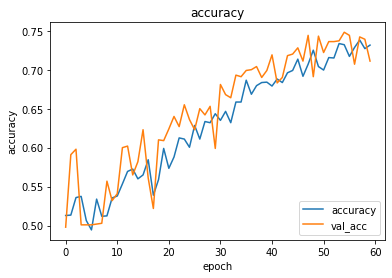

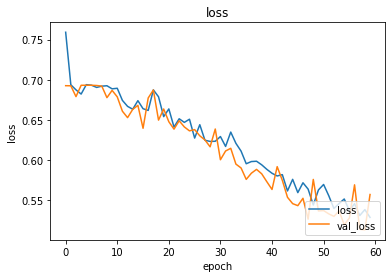

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_acc_loss(history):
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_acc")
    plt.title("accuracy")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend(loc="lower right")
    plt.show()
    
    plt.plot(history.history["loss"],label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.title("loss")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend(loc="lower right")
    plt.show()
plot_acc_loss(history)